In [1]:
# Upload File CSV ke Google Colab
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [2]:
# Import Packege
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format # Hilangin notasi scientific (1.e20)
%matplotlib inline

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,nan,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df['neighbourhood_group']= df['neighbourhood_group'].astype("category").cat.codes
df['neighbourhood'] = df['neighbourhood'].astype("category").cat.codes
df['room_type'] = df['room_type'].astype("category").cat.codes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

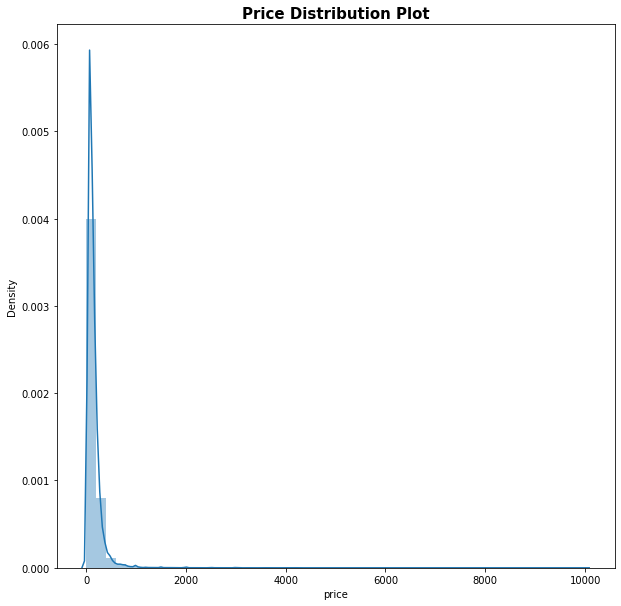

In [6]:
plt.figure(figsize=(10,10))
sns.distplot(df['price'])
plt.title("Price Distribution Plot",size=15, weight='bold')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

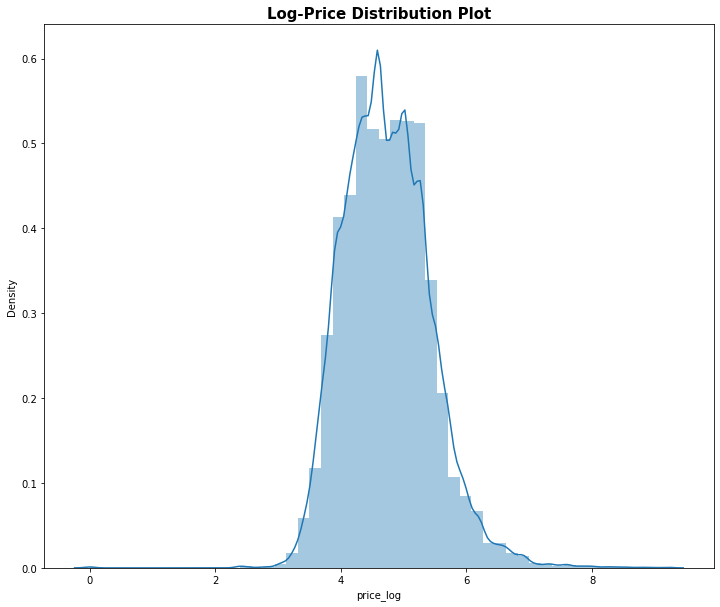

In [7]:
df['price_log'] = np.log(df.price+1)

plt.figure(figsize=(12,10))
sns.distplot(df['price_log'])
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

In [8]:
df = df.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])

In [9]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
price_log                             0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Review per Month Distribution Plot')

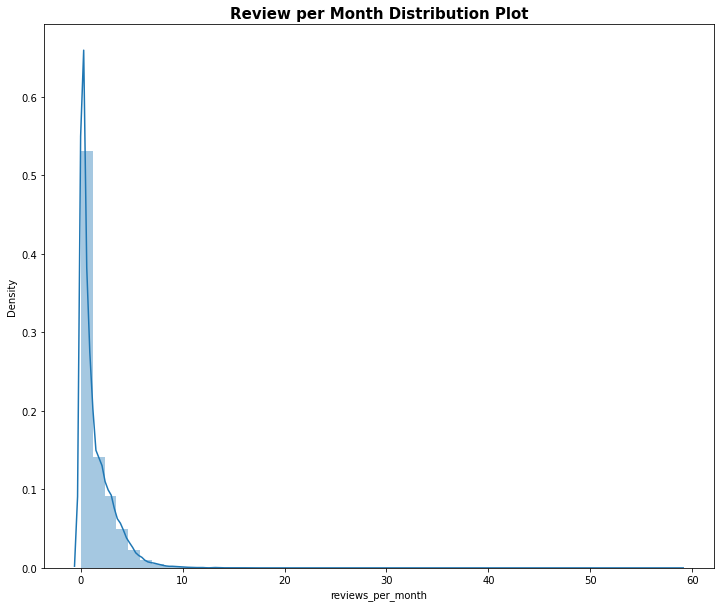

In [10]:
plt.figure(figsize=(12,10))
sns.distplot(df['reviews_per_month'])
plt.title("Review per Month Distribution Plot",size=15, weight='bold')

In [11]:
median = df['reviews_per_month'].median()
df['reviews_per_month'].fillna(median, inplace=True)
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix')

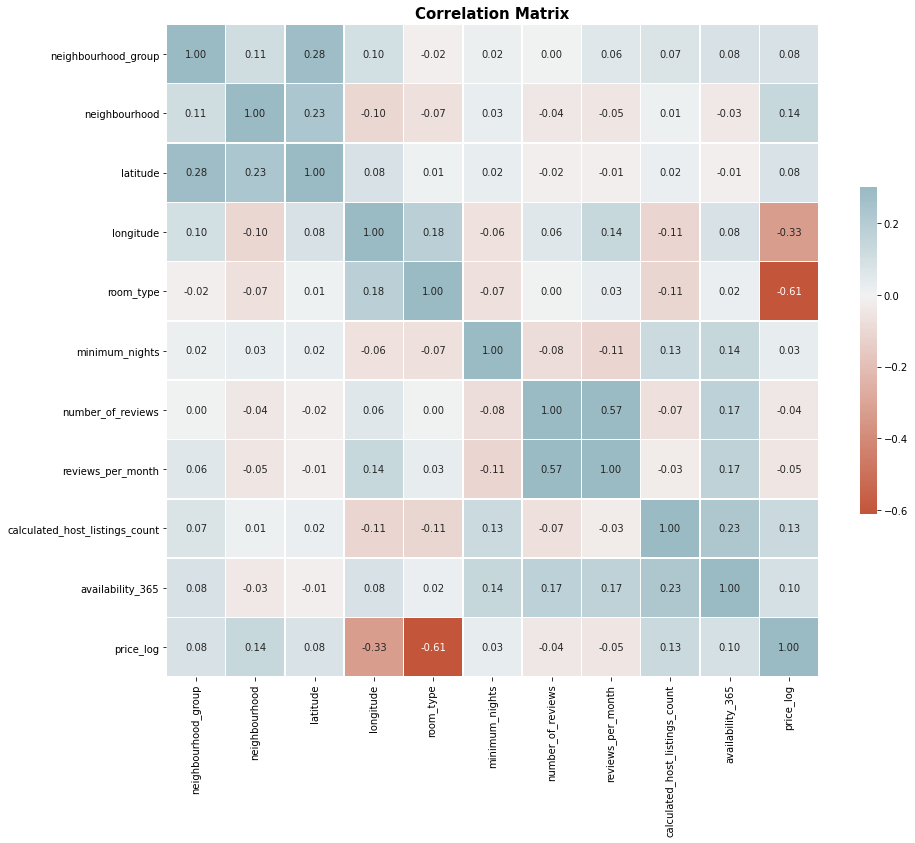

In [12]:
corr = df.corr()

plt.figure(figsize=(15,12))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

# VIF

In [13]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,1,108,40.65,-73.97,1,1,9,0.21,6,365,5.01
1,2,127,40.75,-73.98,0,1,45,0.38,2,355,5.42
2,2,94,40.81,-73.94,1,3,0,0.72,1,365,5.02
3,1,41,40.69,-73.96,0,1,270,4.64,1,194,4.50
4,2,61,40.80,-73.94,0,10,9,0.10,1,0,4.39


In [14]:
#Getting dependent variable (feature) and independent variable (target/label)
X = df.drop(['price_log'],axis=1)
y = df['price_log']

#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression

# Using Multiple Linear Regression
# OLS Stands for Ordinary Least Square
# OLS Optimization Method for Linear Regression
ols_model = LinearRegression().fit(X_train, y_train)

# Predict in Training Dataset
y_train_pred = ols_model.predict(X_train)

# Predict in Test Dataset
y_test_pred = ols_model.predict(X_test)

In [16]:
ols_model.coef_

array([ 5.49818605e-02,  5.51555225e-04,  9.63751197e-01, -3.58740646e+00,
       -7.21391499e-01, -1.46657922e-03, -8.36996911e-04,  3.83973959e-03,
        1.60238715e-04,  7.55203452e-04])

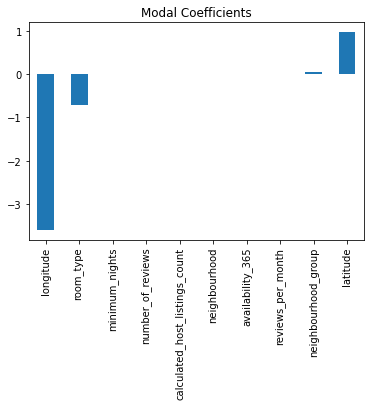

In [17]:
predictors = X_train.columns
coef = pd.Series(ols_model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#R^2
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

#MAE
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

#MSE
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

0.4584230434269787
0.4572200909858145
0.3667379373622484
0.37276313921630877
0.25985366722202974
0.2670953906718653


In [30]:
# Using Lasso Regression
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 0.0005, normalize = False)
lasso_model.fit(X_train, y_train)

y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

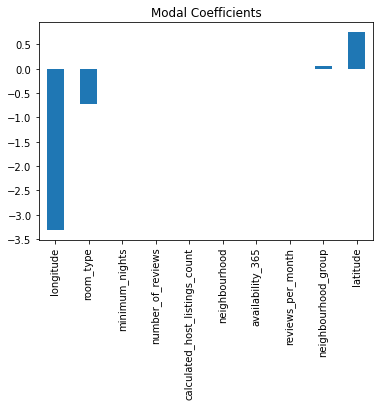

In [31]:
predictors = X_train.columns
coef = pd.Series(lasso_model.coef_,predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [32]:
#R^2
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

#MAPE
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

0.45791703846159615
0.4565900277144844
0.36701363917501634
0.37334198844504146


In [22]:
# Using Ridge Regression
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.0001).fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

In [23]:
#R^2
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

#MAPE
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

0.4584230434268499
0.45722008937660286
0.36673794146347627
0.37276314709307745


In [24]:
# Using Elastic Net Regression
from sklearn.linear_model import ElasticNet

elastic_net_model = ElasticNet(alpha=0.007, l1_ratio=0.5, normalize=False).fit(X_train, y_train)

y_train_pred = elastic_net_model.predict(X_train)
y_test_pred = elastic_net_model.predict(X_test)

In [25]:
#R^2
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

#MAE
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

0.41956557597575883
0.4188258033615291
0.3848749865983836
0.3922559342071301


In [26]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor().fit(X_train, y_train)

y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

In [27]:
#R^2
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

#MAE
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

1.0
0.21203725795687034
6.863881026432628e-18
0.43992184922455296


In [28]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor().fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

In [29]:
#R^2
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

#MAE
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

0.9428224616747126
0.5901977432904811
0.11613243525155192
0.3164830223746169
